In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [4]:
def accuracy(y, y_pred):
    accurate = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            accurate += 1
    return accurate/len(y)

In [2]:
file = 'closeup_identification.csv'
data = np.genfromtxt(file, delimiter = ',', dtype = str)
data = data[1:,:]

In [19]:
img = data[:,0]
actual_labels = data[:,1]
derived_labels = data[:,2]
score_1 = data[:,3]
derived_labels2 = data[:,4]
score_2 = data[:,5]

In [6]:
matrix = confusion_matrix(actual_labels, derived_labels)
acc = accuracy(actual_labels, derived_labels)

In [7]:
print("Accurately classified CUs: ", matrix[0][0])
print("CUs classified as non-CUs: ", matrix[0][1])
print("Accurately classified non-CUs: ", matrix[1][1])
print("non_CUs classified as CUs: ", matrix[1][0])
print("Accuracy: ", acc)

Accurately classified CUs:  333
CUs classified as non-CUs:  167
Accurately classified non-CUs:  446
non_CUs classified as CUs:  54
Accuracy:  0.779


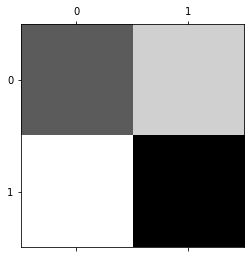

In [9]:
plt.matshow(matrix,cmap= "Greys");

In [75]:
total_cus = matrix[0][0] + matrix[0][1]
total_ncus = matrix[1][1] + matrix[1][0]
#x = matrix[0][0]/total_cus
total_frames = len(actual_labels)
score_1 = score_1.astype(np.float64)
score_2 = score_2.astype(np.float64)

cu_acc = []
ncu_acc = []
acc = []
cu_acc_2 = []
threshold = np.linspace(0.5,1, 15)
for i in threshold:
    #print(i)
    true_cu_above_threshold = []
    true_cu_below_threshold = []
    true_ncu_above_threshold = []
    true_ncu_below_threshold = []
    false_cu_above_threshold = []
    false_ncu_above_threshold = []
    false_cu_below_threshold = []
    false_ncu_below_threshold = []
    
    for j in range(len(actual_labels)):
        if actual_labels[j] == derived_labels[j]:
            if score_1[j] > i and actual_labels[j] == 'CU':
                true_cu_above_threshold.append(img[j])
            if score_1[j] > i and actual_labels[j] == 'non-CU':
                true_ncu_above_threshold.append(img[j])
            if score_1[j] < i and actual_labels[j] == 'CU':
                true_cu_below_threshold.append(img[j])
            else:
                true_ncu_below_threshold.append(img[j])
        else:
            if score_1[j] > i and actual_labels[j] == 'CU':
                false_cu_above_threshold.append(img[j])
            if score_1[j] > i and actual_labels[j] == 'non-CU':
                false_ncu_above_threshold.append(img[j])
            if score_1[j] < i and actual_labels[j] == 'CU':
                false_cu_below_threshold.append(img[j])
            else:
                false_ncu_below_threshold.append(img[j])
                
    cu_acc.append( len(true_cu_above_threshold)/total_cus )
    ncu_acc.append(len(true_ncu_above_threshold)/total_ncus)
    acc.append((len(true_cu_above_threshold) + len(true_ncu_above_threshold))/total_frames)
    if (len(true_cu_above_threshold)+len(false_cu_above_threshold)) > 0:
        denominator = (len(true_cu_above_threshold)+len(false_cu_above_threshold)) 
    else:
        denominator = 0.0000000000000001
    cu_acc_2.append(len(true_cu_above_threshold)/denominator )

In [76]:
print(cu_acc,ncu_acc, acc)

[0.666, 0.636, 0.602, 0.574, 0.538, 0.494, 0.476, 0.454, 0.43, 0.398, 0.356, 0.318, 0.258, 0.162, 0.0] [0.892, 0.87, 0.852, 0.836, 0.818, 0.802, 0.772, 0.744, 0.72, 0.702, 0.668, 0.622, 0.55, 0.45, 0.0] [0.779, 0.753, 0.727, 0.705, 0.678, 0.648, 0.624, 0.599, 0.575, 0.55, 0.512, 0.47, 0.404, 0.306, 0.0]


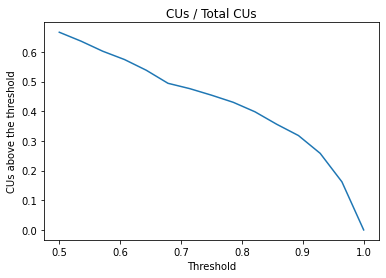

In [77]:
plt.plot(threshold, cu_acc)
plt.title("CUs / Total CUs")
plt.xlabel("Threshold")
plt.ylabel("CUs above the threshold");

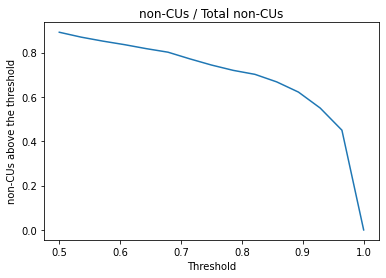

In [78]:
plt.plot(threshold, ncu_acc)
plt.title("non-CUs / Total non-CUs")
plt.xlabel("Threshold")
plt.ylabel("non-CUs above the threshold");

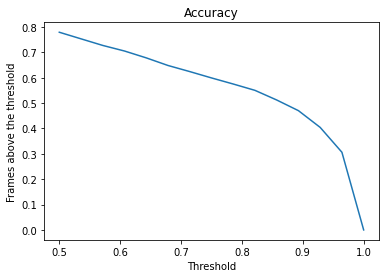

In [79]:
plt.plot(threshold, acc)
plt.title("Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Frames above the threshold");

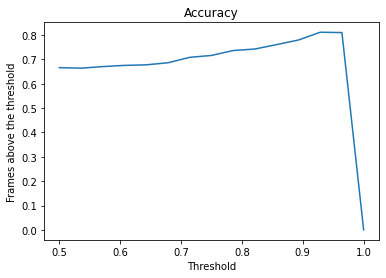

In [80]:
plt.plot(threshold, cu_acc_2)
plt.title("Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Frames above the threshold");